In [1]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
wml = WordNetLemmatizer()

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
data_clean = pd.DataFrame({'text':data.text,'target':data.target})

In [7]:
data_disaster = data_clean.loc[data.target == 1]
data_not_disaster = data_clean.loc[data.target == 0]

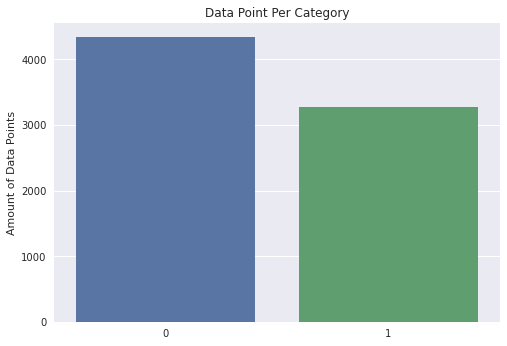

In [8]:
with plt.style.context('seaborn'):
    sns.barplot([0,1],[data_not_disaster.count()[0],data_disaster.count()[0]])
    plt.title('Data Point Per Category')
    plt.ylabel('Amount of Data Points')

In [9]:
tokenize_disaster_text = [word_tokenize(i) for i in data_disaster.text]
tokenize_not_disaster_text = [word_tokenize(i) for i in data_not_disaster.text]

In [21]:
def cleanToken(tokenList,additionalWords=False):
    """"
    Parameters:
        tokenList: List of tokenized words.
        additionalWords: Set to False or pass a list of additional words to remove
        from tokenList.
    Returns:
        Clean list of words.
        
    Removes English stopwords, punctionation, and additional words assigned to additionalWords.
    """
    stopwordsList = stopwords.words('english') + list(string.punctuation)
    
    if additionalWords is not False:
        stopwordsList.extend(additionalWords)
    
    cleanList = []
    for tweet in tokenList:
        clean = []
        for word in tweet:
            word = word.lower()
            if (word not in stopwordsList) and (str.isalpha(word)):
                clean.append(word)
                        
        cleanList.append(clean)
        
    return cleanList

In [24]:
clean_token_disaster_text = cleanToken(tokenize_disaster_text,['http','https'])
clean_token_not_disaster_text = cleanToken(tokenize_not_disaster_text,['http','https'])

In [38]:
lem_clean_disaster_text = [wml.lemmatize(word) for tweet in clean_token_disaster_text for word in tweet]
lem_clean_not_disaster_text = [wml.lemmatize(word) for tweet in clean_token_not_disaster_text for word in tweet]

In [42]:
counted_disaster_text = FreqDist(lem_clean_disaster_text)
counted_not_disaster_text = FreqDist(lem_clean_not_disaster_text)

In [43]:
sorted_counted_disaster_text = {k:v for k,v in sorted(counted_disaster_text.items(), key=lambda item: item[1],reverse= True)}
sorted_counted_not_disaster_text = {k:v for k,v in sorted(counted_not_disaster_text.items(), key=lambda item: item[1],reverse= True)}